<h4> Exercise1: Let's define a nucleotide sequence ATTTGGCCTA and replace within it every Thymine (T) with Uracil (U).

In [3]:
sequence = "ATTTGGCCTA"

sequence.replace("T", "U")

'AUUUGGCCUA'

<h4> Exercise2: Create a function RevComDNA that takes a nucleotide sequence and returns the reverse complementary one.
For example RevComDNA("ATTGGCCAAA") should return 'TTTGGCCAAT'.

In [18]:
def RevComDNA(seq): 
    
    complementary_code = {"A":"T", "T":"A", "G":"C", "C":"G"}
    com_seq = '' #creating an empty string that will contain a complementary sequence   
    for elem in seq:
        com_seq += complementary_code[elem] #add subsequent complement nucleotide to com_seq variable. 
        
    rev_com_seq = com_seq[::-1]
    
    return rev_com_seq

In [20]:
sequence = "ATTGGCCAAA"

print(RevComDNA(sequence))

TTTGGCCAAT


<h4> Exercise3: Write a function FrecNucSeq that for a given nucleotide sequence returns frequencies of occuring for each nucleotide.


In [21]:
def CountNucSeq(seq):
    """
    This function takes a nucleotide 
    sequence and returns the count dictionary
    for each of them.
    """
    nucleotides = ["A", "T", "G", "C"]
    frequencies = [seq.count("A"),seq.count("T"),seq.count("G"),seq.count("C")]
    d = dict(zip(nucleotides, frequencies))
    return d

In [23]:
def FrecNucSeq(seq):
    
    n = len(seq)
    
    nucleotides = ["A", "T", "G", "C"]
    frequencies = [(seq.count("A")/n)*100,(seq.count("T")/n)*100,(seq.count("G")/n)*100,(seq.count("C")/n)*100]
    d = dict(zip(nucleotides, frequencies))
    return d

In [24]:
sequence = "ATGGGGATTG"
print(FrecNucSeq(sequence))

{'A': 20.0, 'T': 30.0, 'G': 50.0, 'C': 0.0}


<h4> Exercise4: Plot a dot matrix for following sequences. Make a comment on it.

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def dotMatrix(sequence1, sequence2):
    
    S1 = len(sequence1)
    S2 = len(sequence2)

    A = np.zeros((S1, S2))

    for i in range(S1):
        for j in range(S2):
            if sequence1[i] == sequence2[j]:  #if sequences have the same residue at i and j poistions respectively
                A[i,j] = 1

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(A)
    xaxis = np.arange(S2)
    yaxis = np.arange(S1)
    ax.set_xticks(xaxis)
    ax.set_yticks(yaxis)
    ax.set_xticklabels(sequence2)
    ax.set_yticklabels(sequence1)

    plt.show()

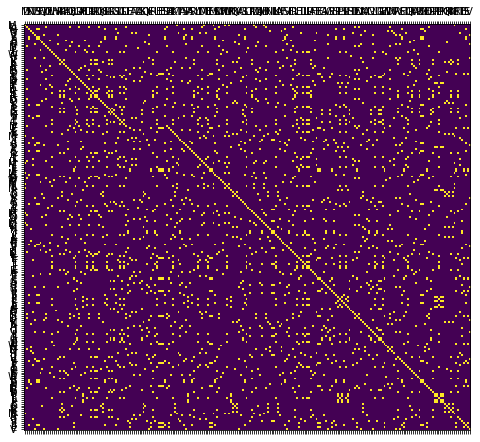

In [26]:
s1 = "MDSNTVSSFQVDCFLWHVRKRFADQELGDAPFLDRLRRDQKSLRGRGSTLGLDEALKMTIASVPASRYLTDMTLEEMSRDWFMLMPKQKVAGSLCIRMDQAIMDKNIILKANFSVIFDRLETLILLRAFTEEGAIVGEISPLPSLPGHTDEDVKNAIGVLIGGLEWNDNTIRVSETLQRFAWRSSNEDGRPPLPPKQKRKMARTIESEV"
s2 = "MDSNTVSSFQVDCFLWHVRKRFADQELGDAPFLDRLRRDQKSLRGRGSTLGLDIETATCAGKQIVERILEEESDEALKMTIASVPASRYLTDMTLEEMSRDWFMLMPKQKVAGSLCIRMDQAIMDKNIILKANFSVIFDRLETLILLRAFTEEGAIVGEISPLPSLPGHTDEDVKNAIGVLIGGLEWNDNTVRVSETLQRFAWRSSNEDGRPPLPPKQKRKMERTIESEV"

dotMatrix(s1, s2)


<h4> Exercise5: Write a function that generates a dot matrix but this time put an appropriate BLOSUM62 value when comparing amino acid on  i  and  j  postions. Applly it to sequences from Ex. 4. 

In [31]:
import numpy as np

B62 = np.array([[4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2,0],
[-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],
[-2, 0,  6,  1, -3,  0,  0,  0,  1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3], 
[-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3], 
[0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1], 
[-1,  1,  0,  0, -3,  5,  2, -2, 0, -3, -2, 1,  0, -3, -1,  0, -1, -2, -1, -2], 
[-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2], 
[0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2, 0, -2, -2, -3, -3], 
[-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
[-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3], 
[-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1], 
[-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2],
[-1, -1, -2, -3, -1,  0, -2, -3, -2, 1, 2, -1,  5,  0, -2, -1, -1, -1, -1,  1], 
[-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1], 
[-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2], 
[1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1, 4, 1, -3, -2, -2], 
[0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1, 1, 5, -2, -2, 0],
[-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11, 2, -3], 
[-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -2, -1, 3, -3, -2, -2,  2, 7, -1],
[0, -3, -3, -3, -1, -2, -2, -3, -3, 3, 1, -2, 1, -1, -2, -2, 0, -3, -1, 4]]) 

In [32]:
aa = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"] #a list of corresponding amino acids

In [33]:
BLOSUM62 = {aa[i]:{aa[j]: B62[i][j] for j in range(20)} for i in range(20)} #the same as B62, but this time stored as a dictionary
print(BLOSUM62)

{'A': {'A': 4, 'R': -1, 'N': -2, 'D': -2, 'C': 0, 'Q': -1, 'E': -1, 'G': 0, 'H': -2, 'I': -1, 'L': -1, 'K': -1, 'M': -1, 'F': -2, 'P': -1, 'S': 1, 'T': 0, 'W': -3, 'Y': -2, 'V': 0}, 'R': {'A': -1, 'R': 5, 'N': 0, 'D': -2, 'C': -3, 'Q': 1, 'E': 0, 'G': -2, 'H': 0, 'I': -3, 'L': -2, 'K': 2, 'M': -1, 'F': -3, 'P': -2, 'S': -1, 'T': -1, 'W': -3, 'Y': -2, 'V': -3}, 'N': {'A': -2, 'R': 0, 'N': 6, 'D': 1, 'C': -3, 'Q': 0, 'E': 0, 'G': 0, 'H': 1, 'I': -3, 'L': -3, 'K': 0, 'M': -2, 'F': -3, 'P': -2, 'S': 1, 'T': 0, 'W': -4, 'Y': -2, 'V': -3}, 'D': {'A': -2, 'R': -2, 'N': 1, 'D': 6, 'C': -3, 'Q': 0, 'E': 2, 'G': -1, 'H': -1, 'I': -3, 'L': -4, 'K': -1, 'M': -3, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -4, 'Y': -3, 'V': -3}, 'C': {'A': 0, 'R': -3, 'N': -3, 'D': -3, 'C': 9, 'Q': -3, 'E': -4, 'G': -3, 'H': -3, 'I': -1, 'L': -1, 'K': -3, 'M': -1, 'F': -2, 'P': -3, 'S': -1, 'T': -1, 'W': -2, 'Y': -2, 'V': -1}, 'Q': {'A': -1, 'R': 1, 'N': 0, 'D': 0, 'C': -3, 'Q': 5, 'E': 2, 'G': -2, 'H': 0, 'I': -3, 'L'

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def dotMatrix(sequence1, sequence2):
    
    S1 = len(sequence1)
    S2 = len(sequence2)

    A = np.zeros((S1, S2))

    for i in range(S1):
        for j in range(S2):
            if sequence1[i] == sequence2[j]:  #if sequences have the same residue at i and j poistions respectively
                A[i,j] = 1

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(A)
    xaxis = np.arange(S2)
    yaxis = np.arange(S1)
    ax.set_xticks(xaxis)
    ax.set_yticks(yaxis)
    ax.set_xticklabels(sequence2)
    ax.set_yticklabels(sequence1)

    plt.show()

In [48]:
import numpy as np
import matplotlib.pyplot as plt


def dotMatrixB62(sequence1, sequence2):
    
    S1 = len(sequence1)
    S2 = len(sequence2)
    
    A = np.zeros((S1, S2))

    for i in range(S1):
        for j in range(S2):
            A[i,j] = BLOSUM62[sequence1[i]][sequence2[j]]

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(A)
    xaxis = np.arange(S2)
    yaxis = np.arange(S1)
    ax.set_xticks(xaxis)
    ax.set_yticks(yaxis)
    ax.set_xticklabels(sequence2)
    ax.set_yticklabels(sequence1)

    plt.show()

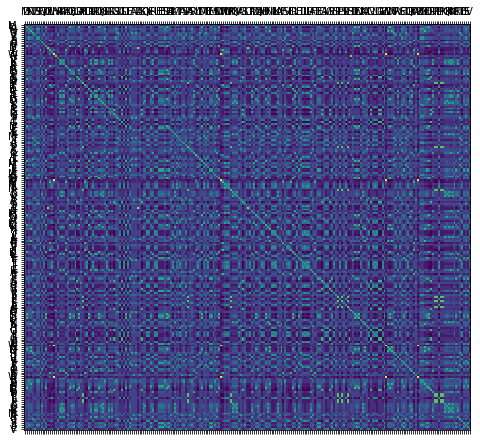

In [50]:
a = "ATGGGGATTG"
b = "ATGGGGATTG"

dotMatrixB62(s1,s2)

<h4> Exercise6: Compare an alignment with (insert=1, extend=1) and (insert=8, extend=2) for the following sequences. Make a comment on it.


In [51]:
DNA_2 = {'G': { 'G': 1, 'C':-3, 'A':-3, 'T':-3, 'N':0 },
        'C': { 'G':-3, 'C': 1, 'A':-3, 'T':-3, 'N':0 },
        'A': { 'G':-3, 'C':-3, 'A': 1, 'T':-3, 'N':0 },
        'T': { 'G':-3, 'C':-3, 'A':-3, 'T': 1, 'N':0 },
        'N': { 'G': 0, 'C': 0, 'A': 0, 'T': 0, 'N':0 }}

In [52]:
def SequenceAlign(seqA, seqB, similarityMatrix, insert, extend):
    
    import numpy as np
    
    numI = len(seqA) + 1
    numJ = len(seqB) + 1
    
    SMatrix = np.zeros((numI, numJ))
    RMatrix = np.zeros((numI, numJ))
    
    for i in range(1, numI):
        RMatrix[i, 0] = 1
        
    for j in range(1, numJ):
        RMatrix[0, j] = 2
    
    for i in range(1, numI):
        for j in range(1, numJ):
            
            penalty1 = insert
            penalty2 = insert
            
            if RMatrix[i-1, j] == 1:
                penalty1 = extend
                
            elif RMatrix[i, j-1] == 2:
                penalty2 = extend
                
            similarity = similarityMatrix[seqA[i-1]][seqB[j-1]]
            
            paths = [SMatrix[i-1, j-1] + similarity,
                     SMatrix[i-1, j] - penalty1,
                     SMatrix[i, j-1] - penalty2]
        
            best = max(paths)         #maximum value of path list
            route = paths.index(best) #index where maximum value
        
            SMatrix[i, j] = best  
            RMatrix[i, j] = route
                    
        alignA = []
        alignB = []
        
        i = numI-1
        j = numJ-1
            
        score = SMatrix[i, j]
        
        while i > 0 or j > 0:
            route = RMatrix[i, j]
            
            if route == 0: 
                alignA.append( seqA[i-1] )
                alignB.append( seqB[j-1] )
                i -= 1
                j -= 1
                
            elif route == 1:
                alignA.append( seqA[i-1] )
                alignB.append( '-' )
                i -= 1
                
            elif route == 2: 
                alignA.append( '-' )
                alignB.append( seqB[j-1] )
                j -= 1
                
    alignA.reverse()
    alignB.reverse()
    
    alignA = ''.join(alignA)
    alignB = ''.join(alignB)
    
    return score, alignA, alignB 

In [57]:
seqA = "FSRPAVVAIST"
seqB = "FSRPAAVVIST"

insert = 1
extend = 1

score, alignA, alignB = SequenceAlign(seqA, seqB, BLOSUM62, insert, extend)
print(score)
print(alignA) 
print(alignB) 

45.0
FSRP-AVVAIST
FSRPAAVV-IST


In [58]:
seqA = "FSRPAVVAIST"
seqB = "FSRPAAVVIST"

insert = 8
extend = 2

score, alignA, alignB = SequenceAlign(seqA, seqB, BLOSUM62, insert, extend)
print(score)
print(alignA) 
print(alignB) 

43.0
FSRPAVVAIST
FSRPAAVVIST


<h4> Exercise7: Plot a dot matrix and make an alignment for the following sequences (Metallothionein). Whether both sequences are similar?

In [62]:
seqA = 'MTSTTLVKCACEPCLCNVDPSKAIDRNGLYYCSEACADGHTGGSKGCGHTGCNCHG'
seqB = 'MTTVTQMKCACDSCLCIVDTSKAVEKEGHYYCSEACANGHPEGSGCGHTGCTCHS'

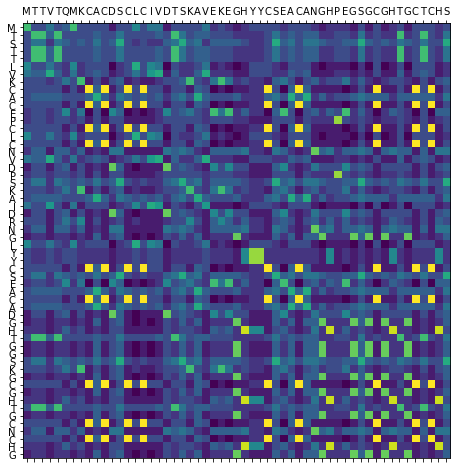

In [63]:
dotMatrixB62(seqA,seqB)

In [72]:
insert = 5
extend = 3

score, alignA, alignB = SequenceAlign(seqA, seqB, BLOSUM62, insert, extend)
print(score)
print(alignA) 
print(alignB) 

226.0
MTSTTLVKCACEPCLCNVDPSKAIDRNGLYYCSEACADGHTGGSKGCGHTGCNCHG
MTTVTQMKCACDSCLCIVDTSKAVEKEGHYYCSEACANGHPEGS-GCGHTGCTCHS


<h4> Exercise8: Download insuline sequences from human and mouse (uniport database available here: https://www.uniprot.org/, ids: P01308 and P01325 respevtively). Plot a dot matrix and make an alignment. Whether both sequences are similar?

In [66]:
P01308 = "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"
P01325 = "MALLVHFLPLLALLALWEPKPTQAFVKQHLCGPHLVEALYLVCGERGFFYTPKSRREVEDPQVEQLELGGSPGDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN"

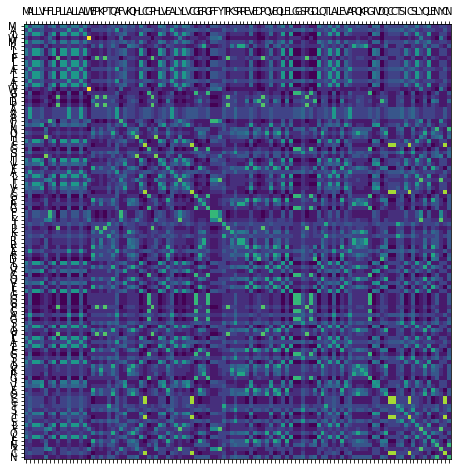

In [67]:
dotMatrixB62(P01308,P01325)

In [71]:
insert = 5
extend = 3

score, alignA, alignB = SequenceAlign(P01308,P01325, BLOSUM62, insert, extend)
print(score)
print(alignA) 
print(alignB) 

445.0
MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
MALLVHFLPLLALLALWEPKPTQAFVKQHLCGPHLVEALYLVCGERGFFYTPKSRREVEDPQVEQLELGGSP--GDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN
